In [219]:
import quandl
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Getting Stock Data

In [220]:
df = quandl.get("WIKI/GOOGL")

print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [221]:
# Get the Adjusted Close Price 
df = df[['Adj. Close']] 

print(df.head())

            Adj. Close
Date                  
2004-08-19   50.322842
2004-08-20   54.322689
2004-08-23   54.869377
2004-08-24   52.597363
2004-08-25   53.164113


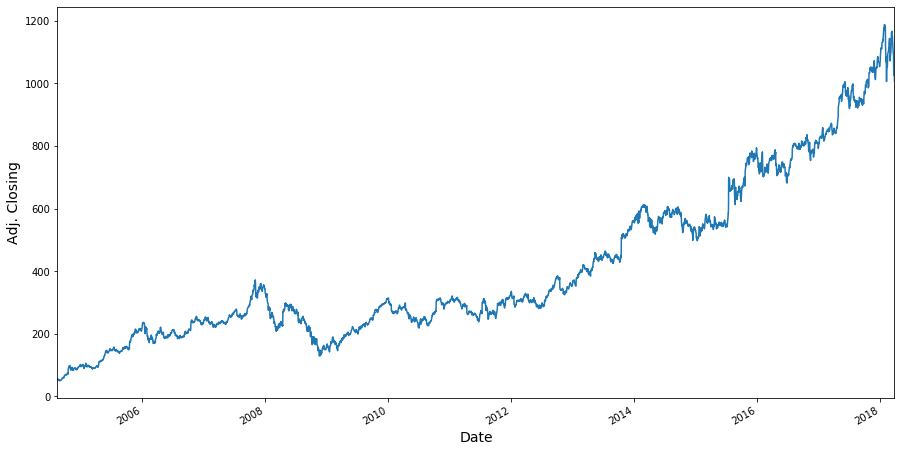

In [222]:
fig = plt.figure()
fig.set_size_inches(15, 8, forward=True)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adj. Closing', fontsize=14)
df['Adj. Close'].plot()
plt.show()

In [223]:
# A variable for predicting 'n' days out into the future
forecast_out = 100
#Create another column (the target ) shifted 'n' units up
df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)
#print the new data set
print(df.tail())

            Adj. Close  Prediction
Date                              
2018-03-21     1094.00         NaN
2018-03-22     1053.15         NaN
2018-03-23     1026.55         NaN
2018-03-26     1054.09         NaN
2018-03-27     1006.94         NaN


In [224]:
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

#Remove the last '30' rows
X = X[:-forecast_out]
print(X)

[[  50.32284179]
 [  54.32268894]
 [  54.86937651]
 ...
 [ 991.42      ]
 [1033.67      ]
 [1033.13      ]]


In [225]:
# Convert the dataframe to a numpy array 
y = np.array(df['Prediction'])
# Get all of the y values except the last '30' rows
y = y[:-forecast_out]
print(y)

[  97.06964469   97.99249344   97.96741603 ... 1026.55       1054.09
 1006.94      ]


In [226]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## SVM (Regression)

In [227]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [228]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 

svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9536293670025048


## Linear Regression

In [229]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [230]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.951705303603329


## Predicting last 'forecast_out' stocks

In [231]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[1033.04]
 [1042.6 ]
 [1042.97]
 [1049.99]
 [1042.68]
 [1052.39]
 [1047.72]
 [1044.15]
 [1041.2 ]
 [1041.64]
 [1036.41]
 [1048.47]
 [1035.89]
 [1034.66]
 [1050.3 ]
 [1051.92]
 [1056.52]
 [1072.01]
 [1063.29]
 [1037.38]
 [1036.17]
 [1025.07]
 [1011.87]
 [1019.6 ]
 [1032.72]
 [1044.57]
 [1049.38]
 [1051.97]
 [1048.77]
 [1051.39]
 [1057.47]
 [1072.  ]
 [1085.09]
 [1079.78]
 [1073.56]
 [1070.85]
 [1068.86]
 [1065.85]
 [1060.2 ]
 [1055.95]
 [1053.4 ]
 [1073.21]
 [1091.52]
 [1095.76]
 [1110.29]
 [1114.21]
 [1112.79]
 [1110.14]
 [1111.88]
 [1130.65]
 [1130.7 ]
 [1139.1 ]
 [1135.97]
 [1143.5 ]
 [1164.16]
 [1176.17]
 [1171.29]
 [1182.14]
 [1187.56]
 [1186.48]
 [1177.37]
 [1182.22]
 [1181.59]
 [1119.2 ]
 [1068.76]
 [1084.43]
 [1055.41]
 [1005.6 ]
 [1043.43]
 [1054.56]
 [1054.14]
 [1072.7 ]
 [1091.36]
 [1095.5 ]
 [1103.59]
 [1113.75]
 [1109.9 ]
 [1128.09]
 [1143.7 ]
 [1117.51]
 [1103.92]
 [1071.41]
 [1084.14]
 [1094.76]
 [1100.9 ]
 [1115.04]
 [1129.38]
 [1160.84]
 [1165.93]
 [1139.91]
 [1148.89]

In [232]:
# Print linear regression model predictions for the next '30' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)
# Print support vector regressor model predictions for the next '30' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[1108.38166399 1118.60553286 1119.00122653 1126.50871184 1118.69108825
 1129.07537348 1124.0810777  1120.26316851 1117.10831357 1117.57886821
 1111.98568471 1124.88315946 1111.42957469 1110.1141606  1126.84023896
 1128.57273557 1133.49217039 1150.0578324  1140.7322951  1113.02304379
 1111.72901855 1099.85820845 1085.74156942 1094.0083588  1108.03944244
 1120.71233429 1125.856352   1128.62620769 1125.20399217 1128.00593113
 1134.50814062 1150.04713798 1164.04613835 1158.36739947 1151.71546804
 1148.81727927 1146.68908899 1143.47006752 1137.42771824 1132.88258825
 1130.15551025 1151.34116322 1170.92265266 1175.45708823 1190.99608559
 1195.1882996  1193.66969146 1190.83566923 1192.69649893 1212.76993185
 1212.82340397 1221.80671971 1218.45936516 1226.51226606 1248.60694502
 1261.45094766 1256.23206898 1267.83551849 1273.63189603 1272.47689829
 1262.73427848 1267.92107388 1267.2473252  1200.52481693 1146.58214476
 1163.3403064  1132.30508938 1079.03616589 1119.49317001 1131.39606338
 1130.

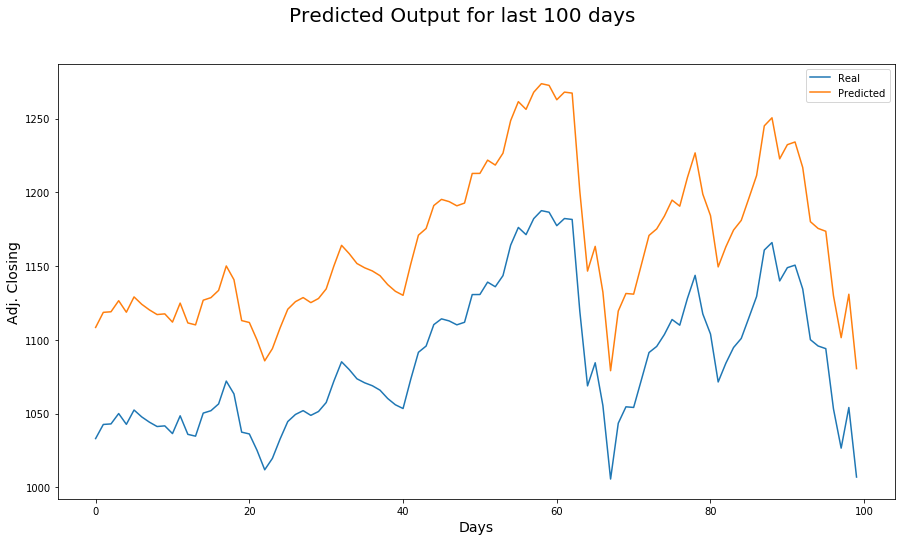

In [233]:
fig = plt.figure()
fig.set_size_inches(15, 8, forward=True)
fig.suptitle('Predicted Output for last ' + str(forecast_out) + ' days', fontsize=20)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Adj. Closing', fontsize=14)
plt.plot(x_forecast)
plt.plot(lr_prediction)
plt.legend(['Real', 'Predicted'])
# plt.plot(svm_prediction)
plt.show()